In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/admin/ICT_DataScience_Analysis_Projects/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
#Description of the dataset
print(f'Information for the dataset is: ' , df.info())
print(f'The size of the Dataset is:  \n' , df.size)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [5]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.size

630000

In [8]:
df.select_dtypes(include=['object']).columns.tolist()

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [9]:
df.select_dtypes(include=['int64','float64']).columns.tolist()

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

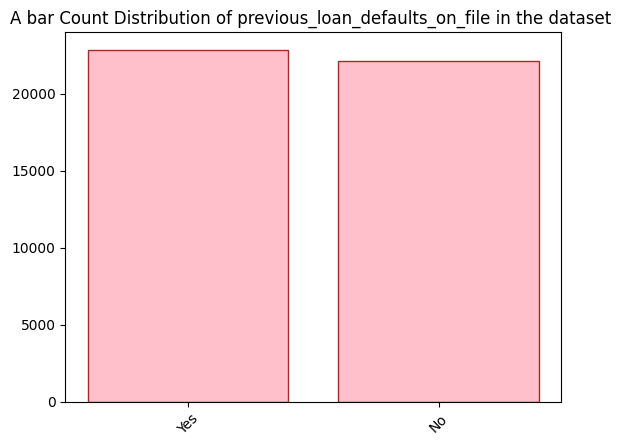

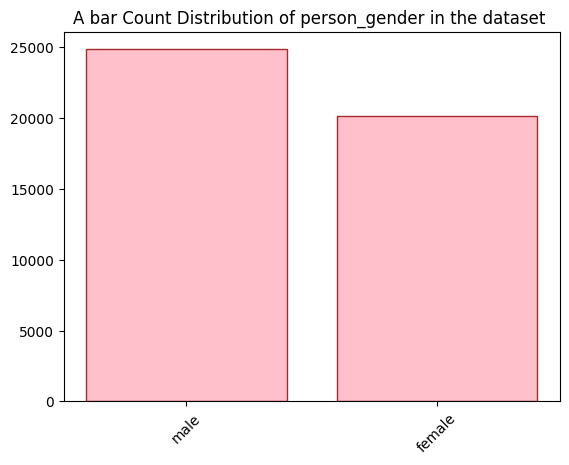

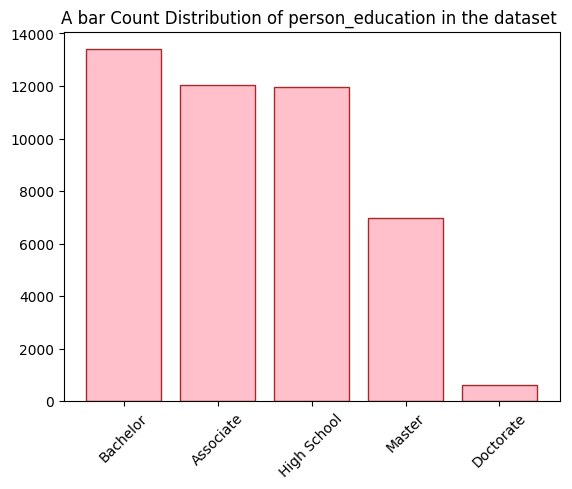

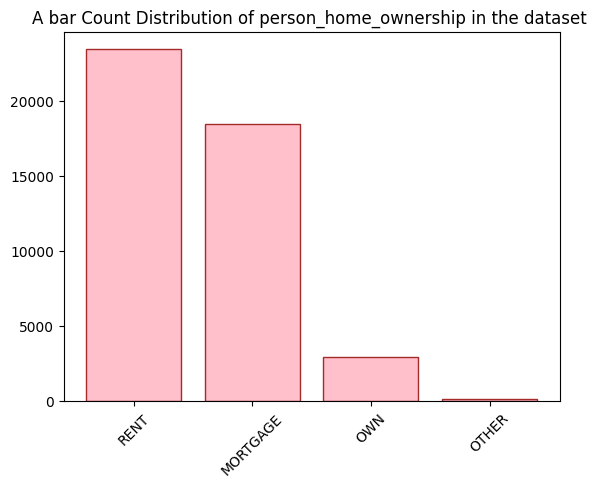

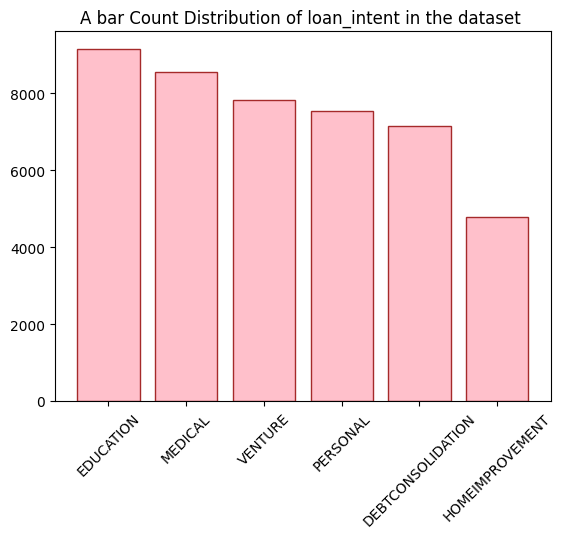

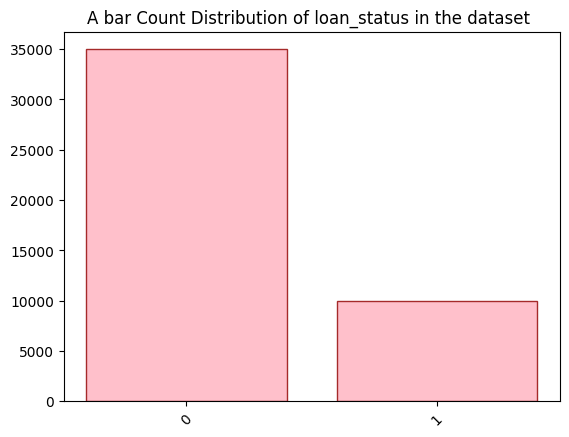

In [10]:
#Count of the Categorial Columns using the bar chart
def count_bar_categorical_columns(column):
    counts = df[column].value_counts()
    plt.figure()
    plt.bar(
        
        counts.index.astype(str),counts.values, color='pink', edgecolor='brown'
        #autopct='%1.1f%%',
        #startangle=90
    )
    plt.title(f'A bar Count Distribution of {column} in the dataset ')
    plt.xticks(rotation=45)
    plt.show()
count_bar_categorical_columns('previous_loan_defaults_on_file')
count_bar_categorical_columns('person_gender')
count_bar_categorical_columns('person_education')
count_bar_categorical_columns('person_home_ownership')
count_bar_categorical_columns('loan_intent')
count_bar_categorical_columns('loan_status')

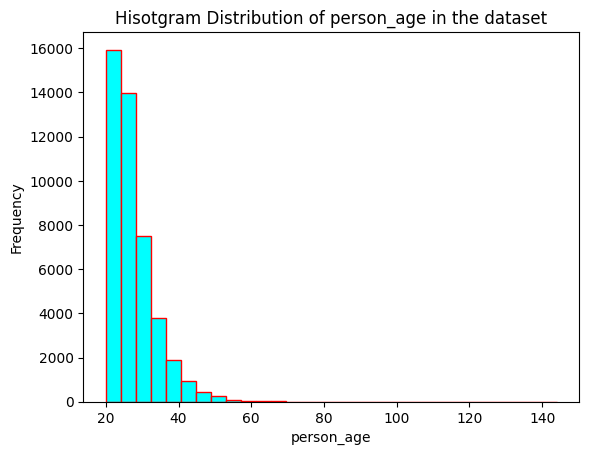

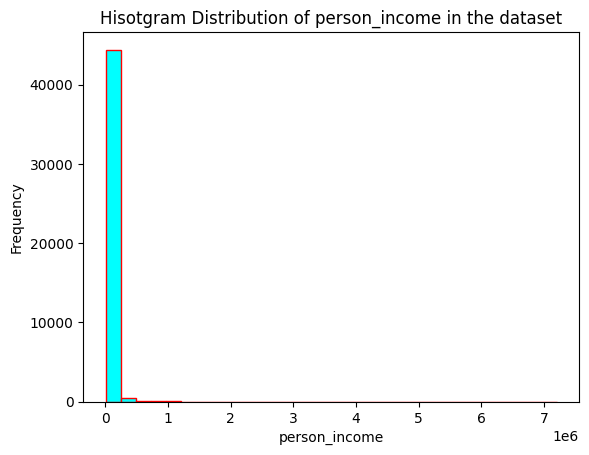

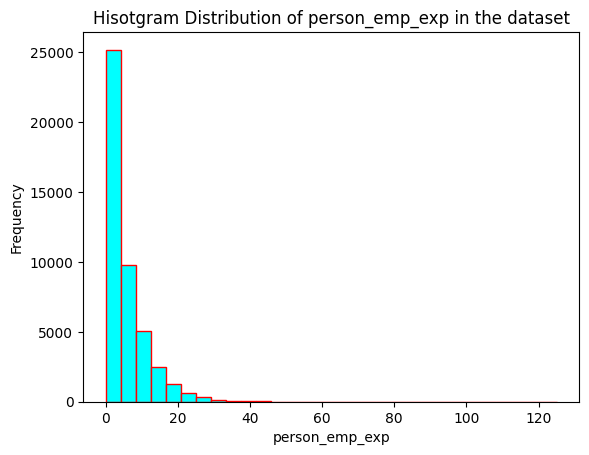

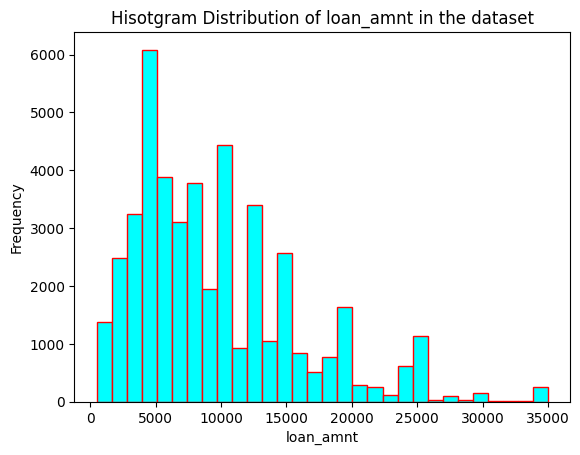

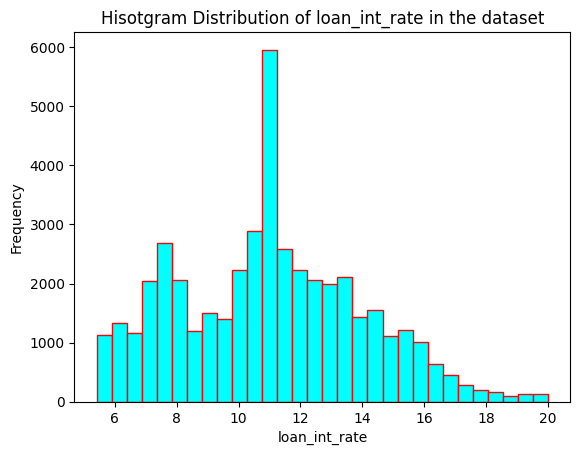

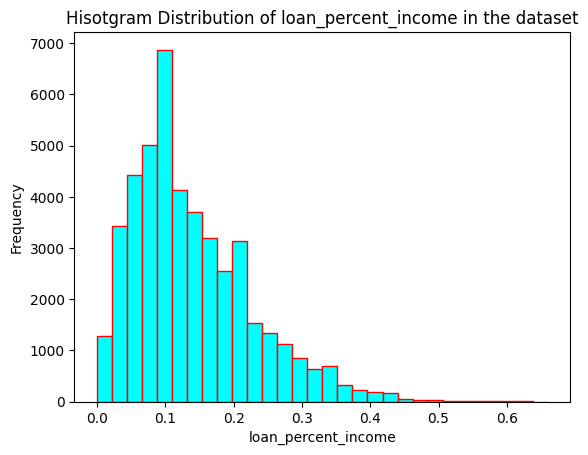

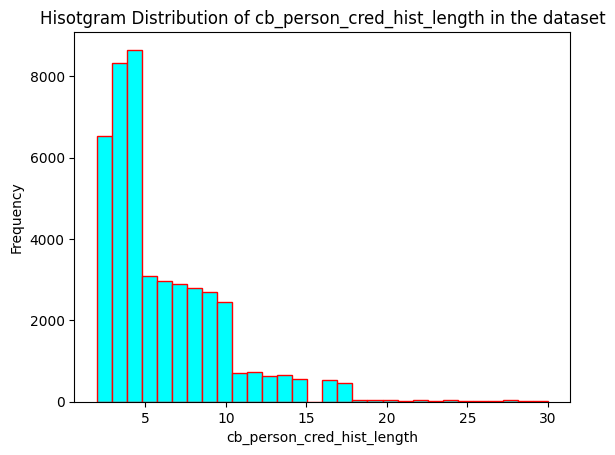

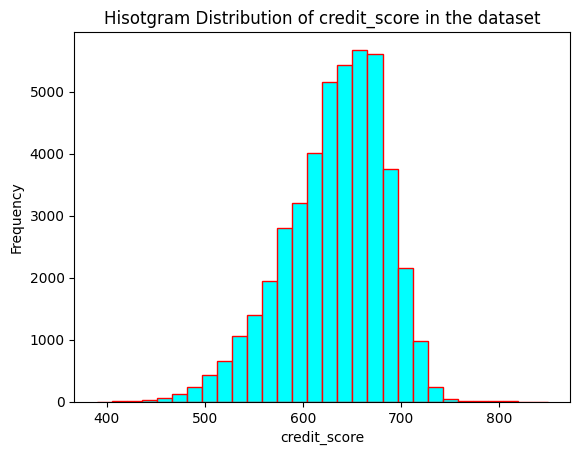

In [11]:
#Histogram distribution of numerical Data
def histogram_distribution_numerical(columns, bins =30):
    plt.figure()
    plt.hist(df[columns], bins=bins, color='cyan',edgecolor='red')
    plt.xlabel(columns)
    plt.ylabel('Frequency')
    plt.title(f'Hisotgram Distribution of {columns} in the dataset')
    plt.show()
histogram_distribution_numerical('person_age')
histogram_distribution_numerical('person_income')
histogram_distribution_numerical('person_emp_exp')
histogram_distribution_numerical('loan_amnt')
histogram_distribution_numerical('loan_int_rate')
histogram_distribution_numerical('loan_percent_income')
histogram_distribution_numerical('cb_person_cred_hist_length')
histogram_distribution_numerical('credit_score')



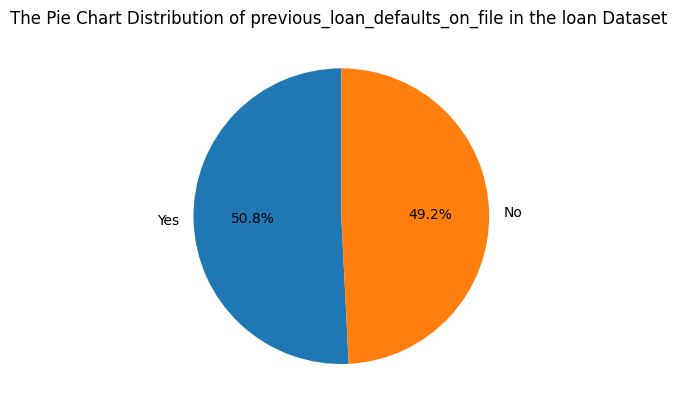

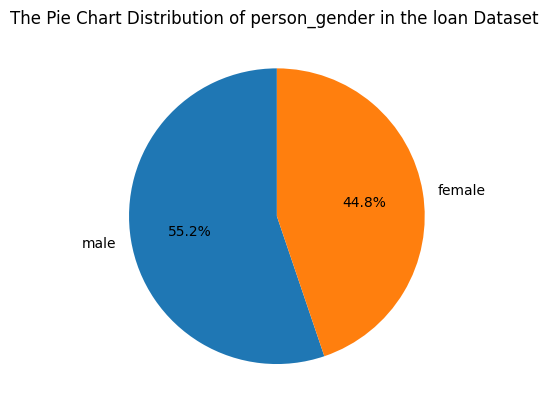

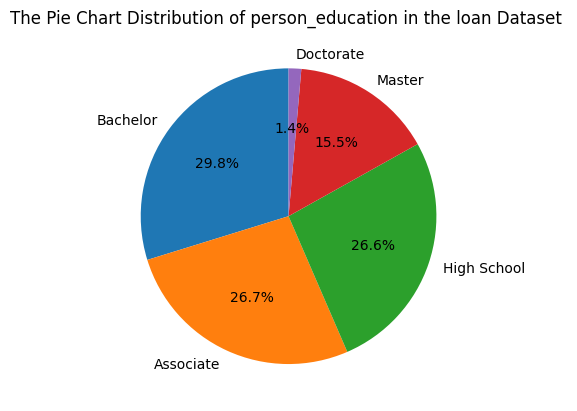

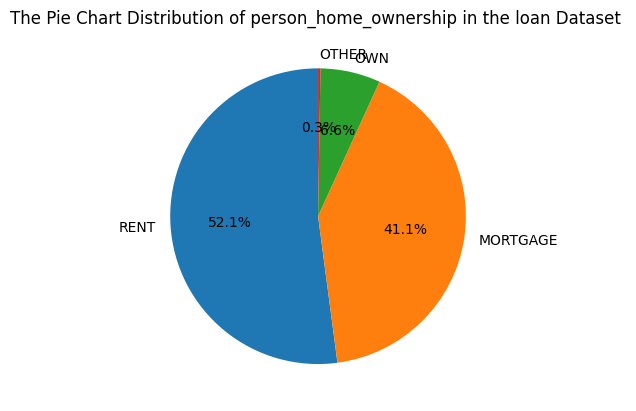

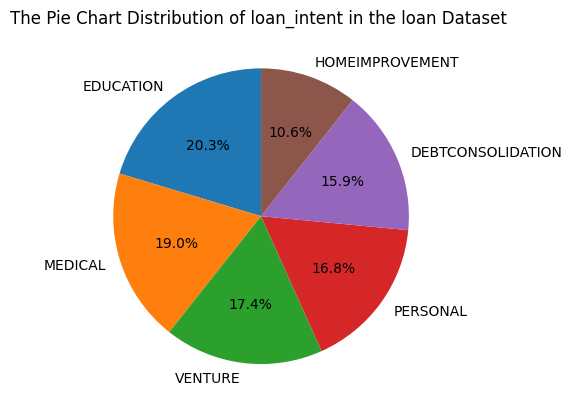

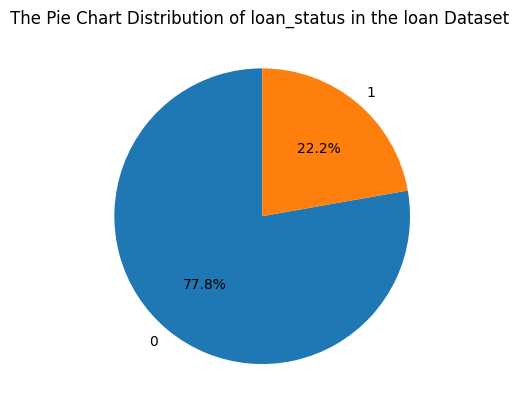

In [12]:
#Pie chart Distribution of Categorial Data
def pie_chart_categorical(columns):
    counts = df[columns].value_counts()
    plt.figure()
    plt.pie(
        counts.values,
        labels=counts.index.astype(str),
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f'The Pie Chart Distribution of {columns} in the loan Dataset ')
    plt.show()
pie_chart_categorical('previous_loan_defaults_on_file')
pie_chart_categorical('person_gender')
pie_chart_categorical('person_education')
pie_chart_categorical('person_home_ownership')
pie_chart_categorical('loan_intent')
pie_chart_categorical('loan_status')   


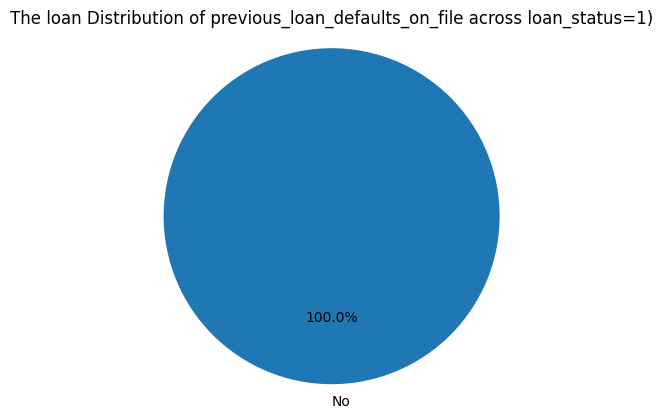

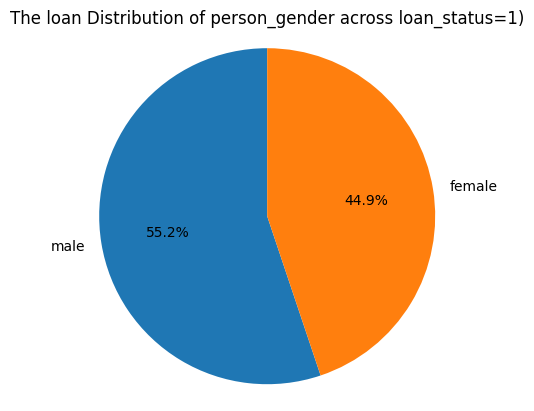

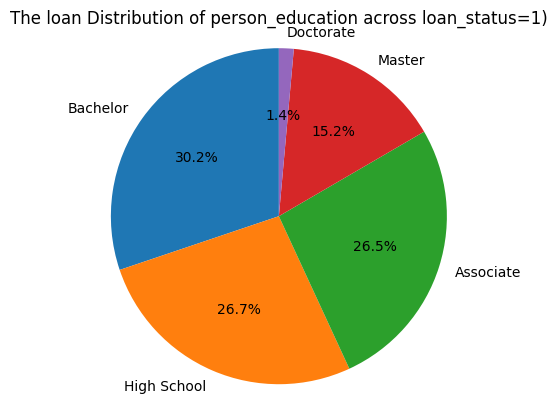

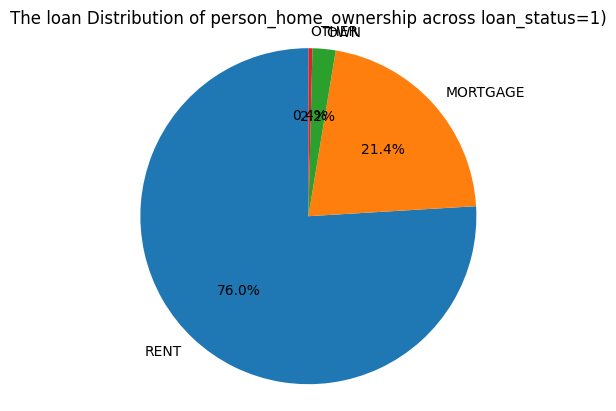

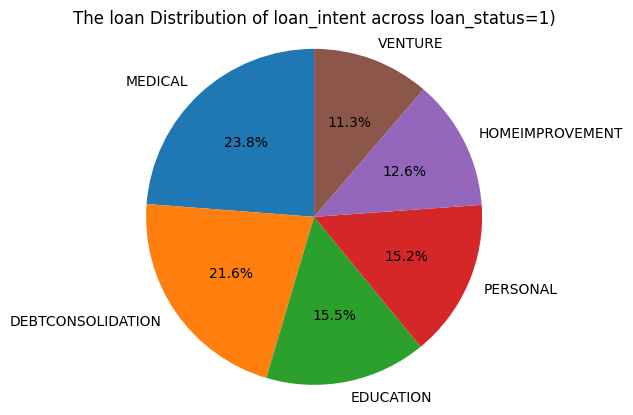

In [13]:
#THe pie chart distribution of the loan status amidist the various categories
def pie_chart_target_column(columns, target='loan_status', value=1):
    
    filtered = df[df[target]==value]
    counts= filtered[columns].value_counts()
    plt.figure()
    plt.pie(
        counts.values,
        labels=counts.index.astype(str),
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f'The loan Distribution of {columns} across loan_status={value})')
    plt.axis('equal')
    plt.show()
pie_chart_target_column('previous_loan_defaults_on_file')
pie_chart_target_column('person_gender')
pie_chart_target_column('person_education')
pie_chart_target_column('person_home_ownership')
pie_chart_target_column('loan_intent')



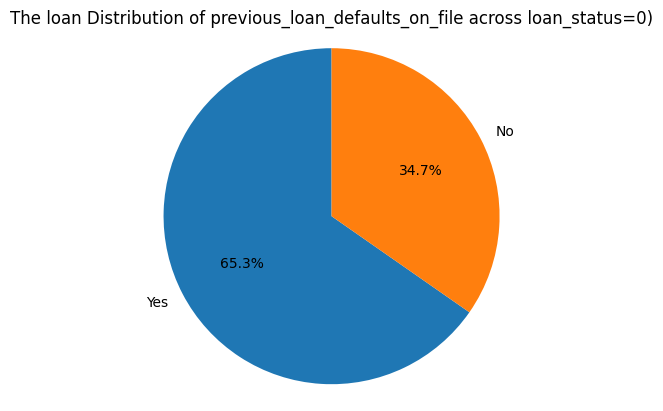

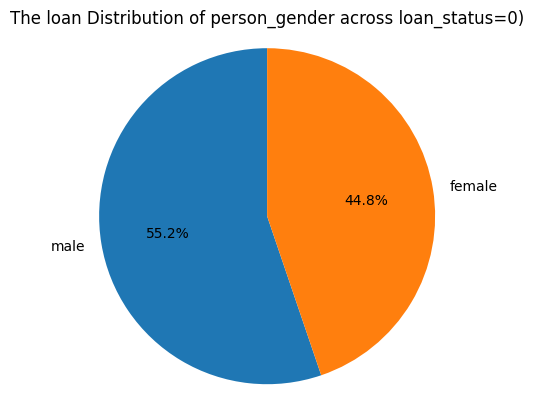

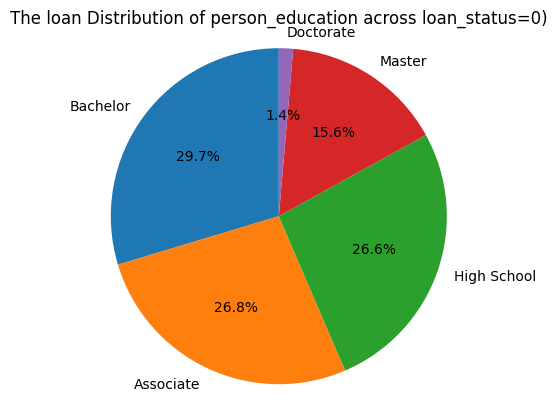

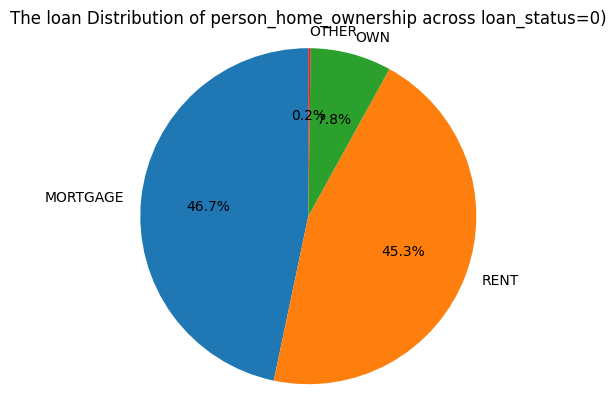

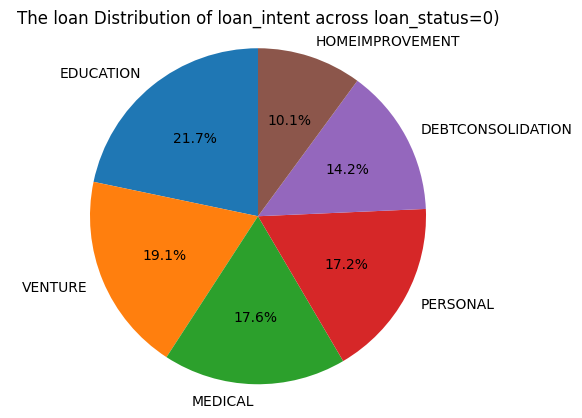

In [14]:
#THe pie chart distribution of the loan status amidist the various categories
def pie_chart_target_column(columns, target='loan_status', value=0):
    
    filtered = df[df[target]==value]
    counts= filtered[columns].value_counts()
    plt.figure()
    plt.pie(
        counts.values,
        labels=counts.index.astype(str),
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f'The loan Distribution of {columns} across loan_status={value})')
    plt.axis('equal')
    plt.show()
pie_chart_target_column('previous_loan_defaults_on_file')
pie_chart_target_column('person_gender')
pie_chart_target_column('person_education')
pie_chart_target_column('person_home_ownership')
pie_chart_target_column('loan_intent')



In [15]:
df.select_dtypes(include=['int64','float64']).columns.tolist()

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

In [16]:
df_loanStatus = df.groupby('loan_status')[['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']].mean()
df_loanStatus


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
loan_status,,,,,,,,
0,27.833571,86157.040743,5.476714,9219.576914,10.477981,0.121783,5.898286,632.814914
1,27.521300,59886.096900,5.178000,10855.689800,12.856794,0.202521,5.759700,631.887200


In [17]:
df.select_dtypes(include=['object']).columns.tolist()

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

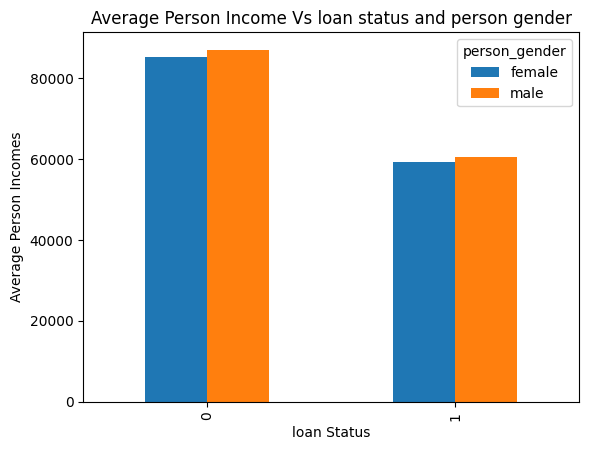

In [18]:
df.groupby(['loan_status','person_gender'])['person_income'].mean().unstack().plot(kind='bar')
plt.title(f'Average Person Income Vs loan status and person gender')
plt.xlabel('loan Status')
plt.ylabel('Average Person Incomes')
plt.show()

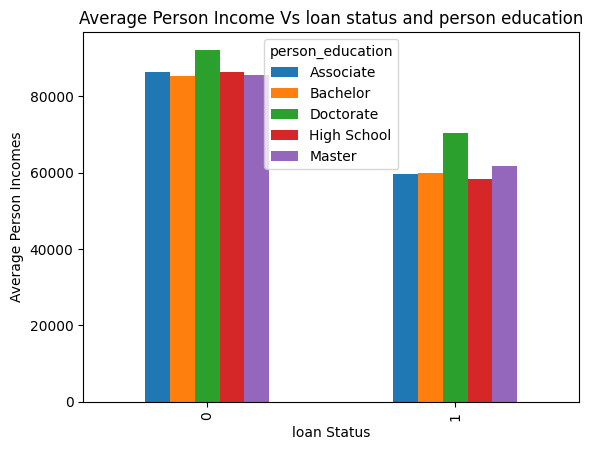

In [19]:
df.groupby(['loan_status','person_education'])['person_income'].mean().unstack().plot(kind='bar')
plt.title(f'Average Person Income Vs loan status and person education')
plt.xlabel('loan Status')
plt.ylabel('Average Person Incomes')
plt.show()

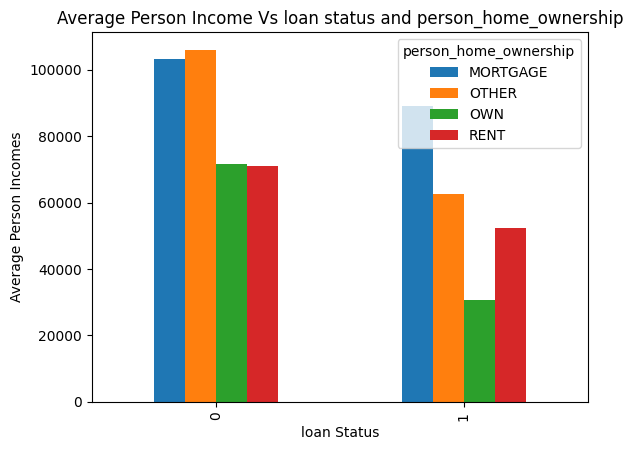

In [20]:
df.groupby(['loan_status','person_home_ownership'])['person_income'].mean().unstack().plot(kind='bar')
plt.title(f'Average Person Income Vs loan status and person_home_ownership')
plt.xlabel('loan Status')
plt.ylabel('Average Person Incomes')
plt.show()

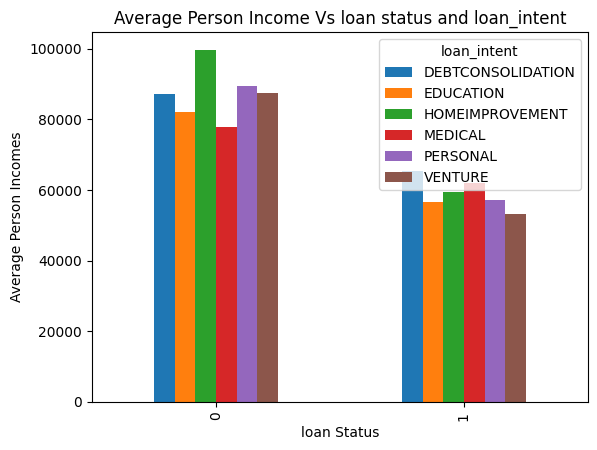

In [21]:
df.groupby(['loan_status','loan_intent'])['person_income'].mean().unstack().plot(kind='bar')
plt.title(f'Average Person Income Vs loan status and loan_intent')
plt.xlabel('loan Status')
plt.ylabel('Average Person Incomes')
plt.show()

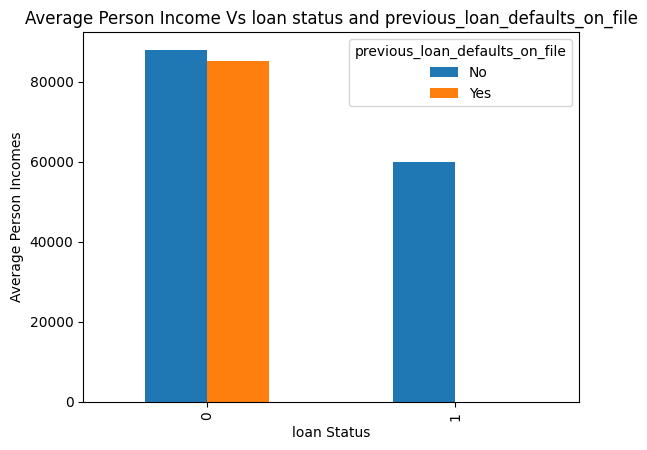

In [22]:
df.groupby(['loan_status','previous_loan_defaults_on_file'])['person_income'].mean().unstack().plot(kind='bar')
plt.title(f'Average Person Income Vs loan status and previous_loan_defaults_on_file')
plt.xlabel('loan Status')
plt.ylabel('Average Person Incomes')
plt.show()

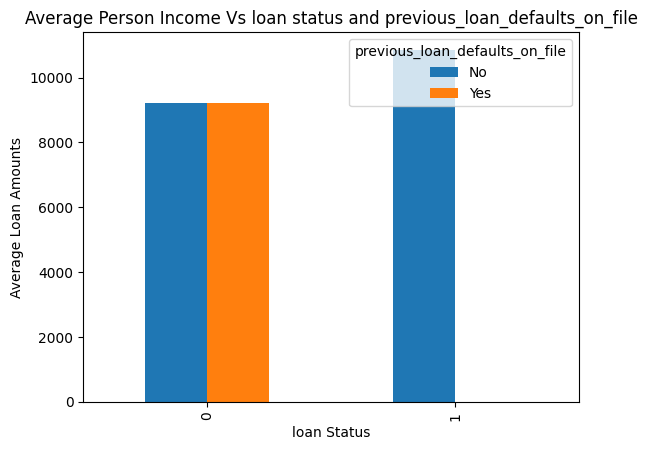

In [23]:
df.groupby(['loan_status','previous_loan_defaults_on_file'])['loan_amnt'].mean().unstack().plot(kind='bar')
plt.title(f'Average Person Income Vs loan status and previous_loan_defaults_on_file')
plt.xlabel('loan Status')
plt.ylabel('Average Loan Amounts')
plt.show()

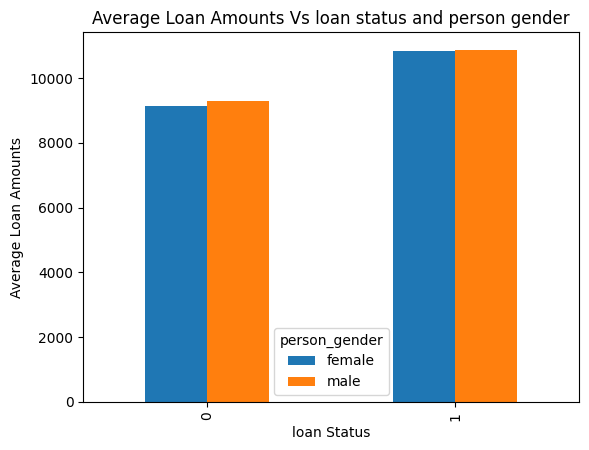

In [24]:
df.groupby(['loan_status','person_gender'])['loan_amnt'].mean().unstack().plot(kind='bar')
plt.title(f'Average Loan Amounts Vs loan status and person gender')
plt.xlabel('loan Status')
plt.ylabel('Average Loan Amounts')
plt.show()

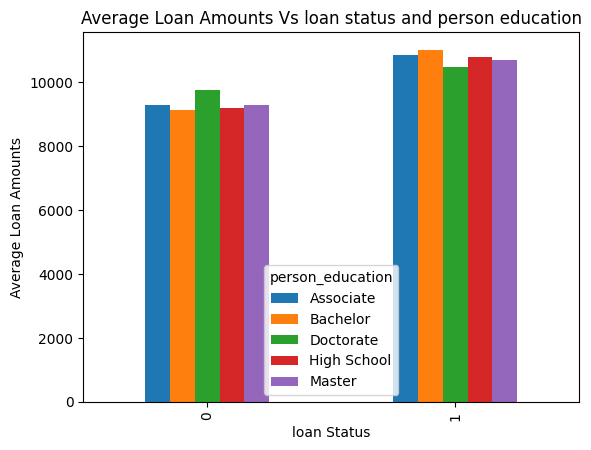

In [25]:
df.groupby(['loan_status','person_education'])['loan_amnt'].mean().unstack().plot(kind='bar')
plt.title(f'Average Loan Amounts Vs loan status and person education')
plt.xlabel('loan Status')
plt.ylabel('Average Loan Amounts')
plt.show()

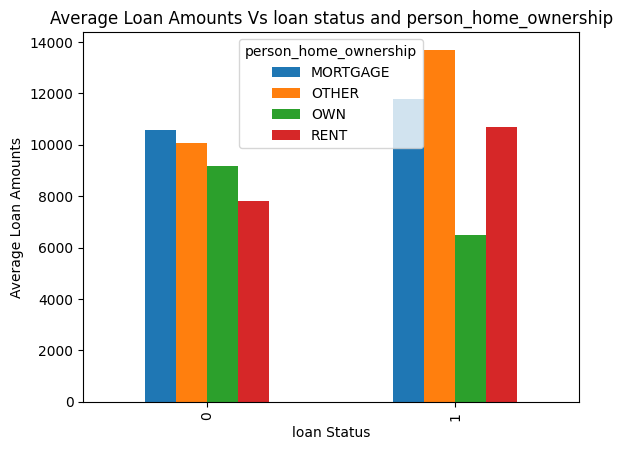

In [26]:
df.groupby(['loan_status','person_home_ownership'])['loan_amnt'].mean().unstack().plot(kind='bar')
plt.title(f'Average Loan Amounts Vs loan status and person_home_ownership')
plt.xlabel('loan Status')
plt.ylabel('Average Loan Amounts')
plt.show()

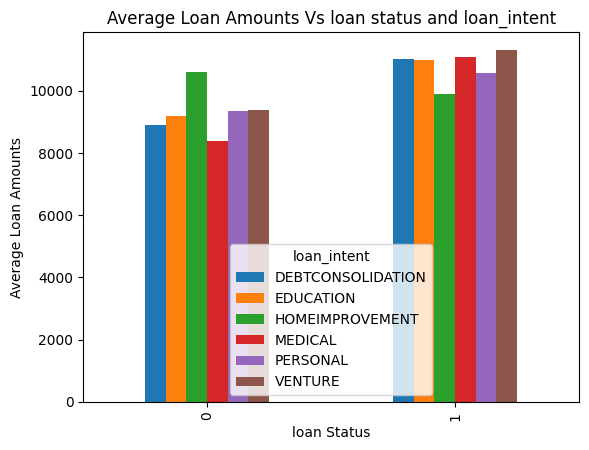

In [27]:
df.groupby(['loan_status','loan_intent'])['loan_amnt'].mean().unstack().plot(kind='bar')
plt.title(f'Average Loan Amounts Vs loan status and loan_intent')
plt.xlabel('loan Status')
plt.ylabel('Average Loan Amounts')
plt.show()

In [28]:
numerical_colums =['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']


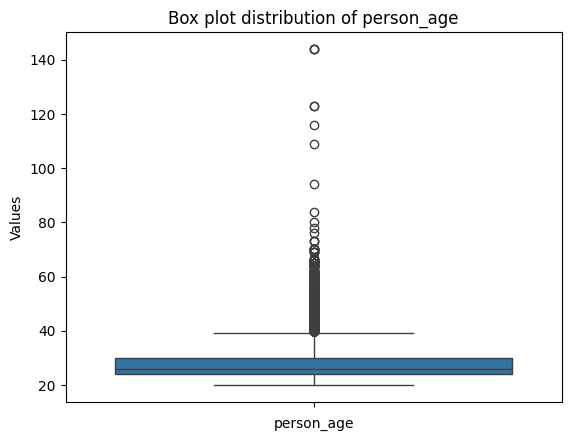

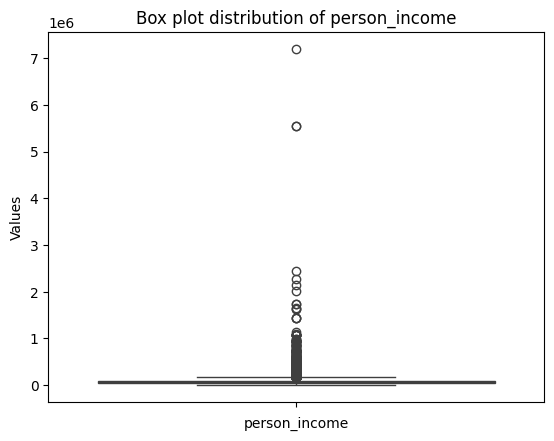

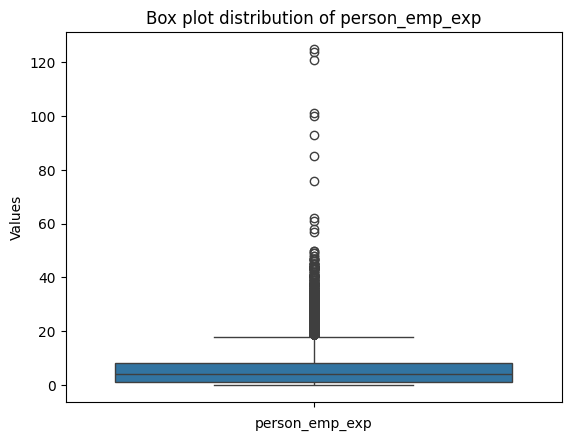

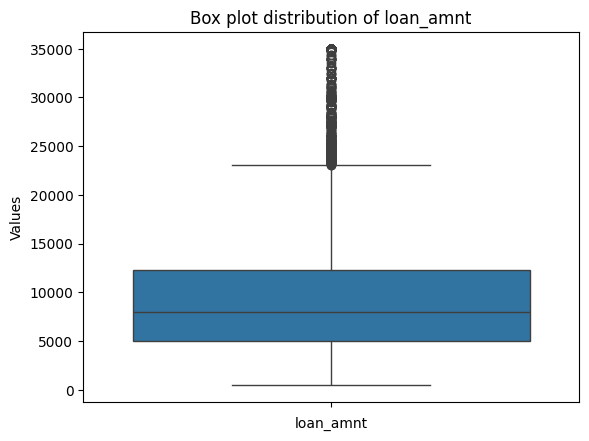

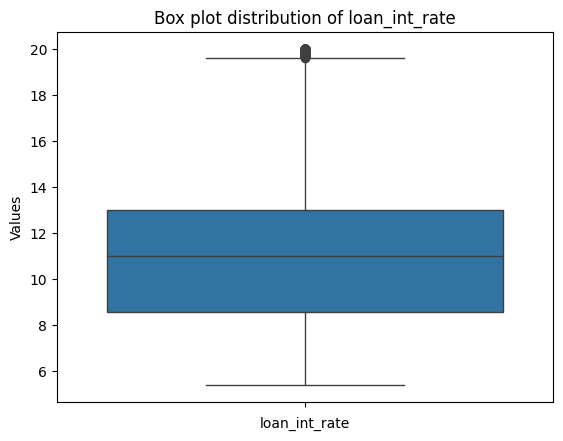

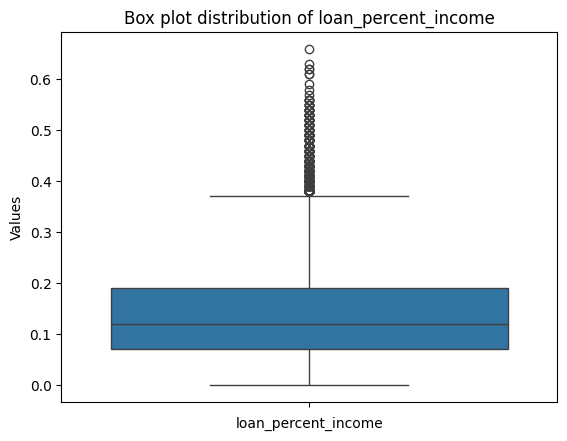

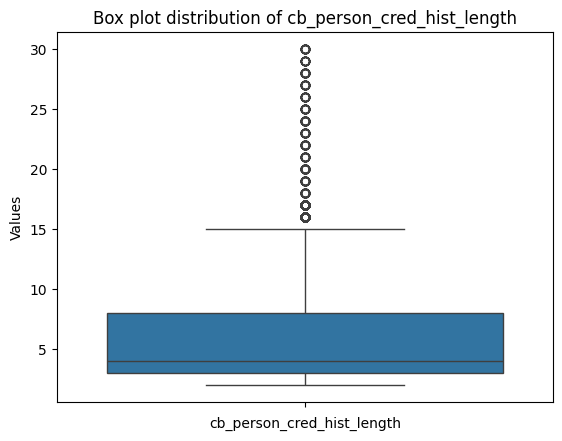

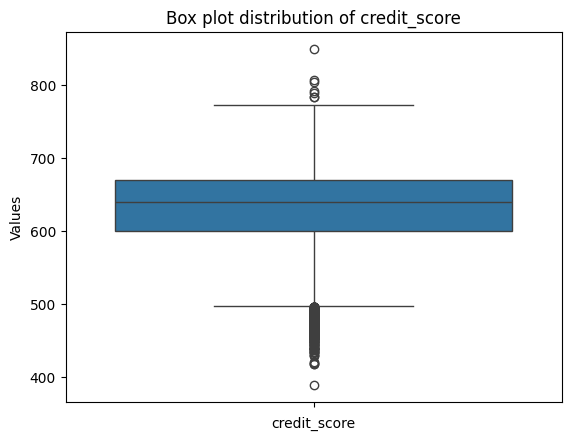

In [31]:
def plot_boxplot_numerical(column):
    plt.figure()
    sns.boxplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.title(f'Box plot distribution of {column}')
    plt.show()

plot_boxplot_numerical('person_age')
plot_boxplot_numerical('person_income')
plot_boxplot_numerical('person_emp_exp')
plot_boxplot_numerical('loan_amnt')
plot_boxplot_numerical('loan_int_rate')
plot_boxplot_numerical('loan_percent_income')
plot_boxplot_numerical('cb_person_cred_hist_length')
plot_boxplot_numerical('credit_score')


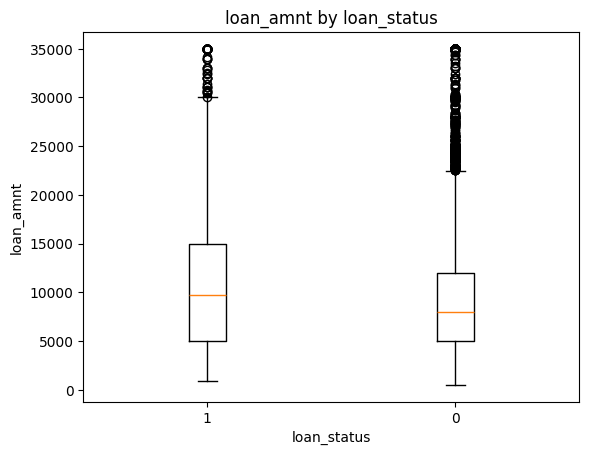

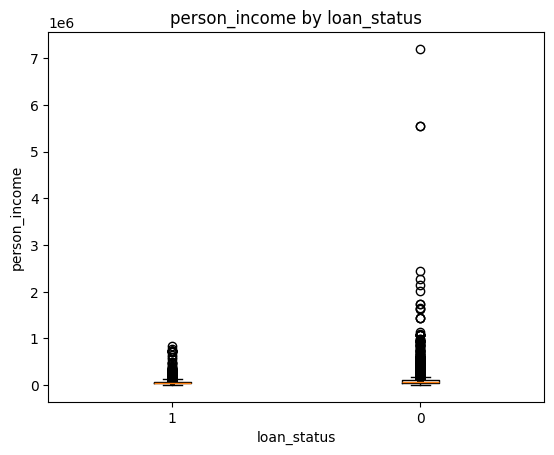

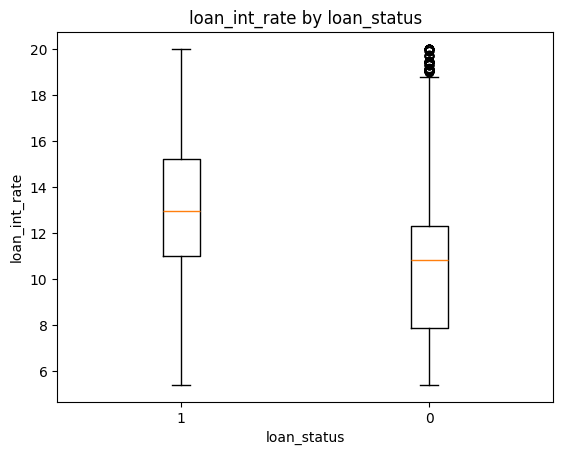

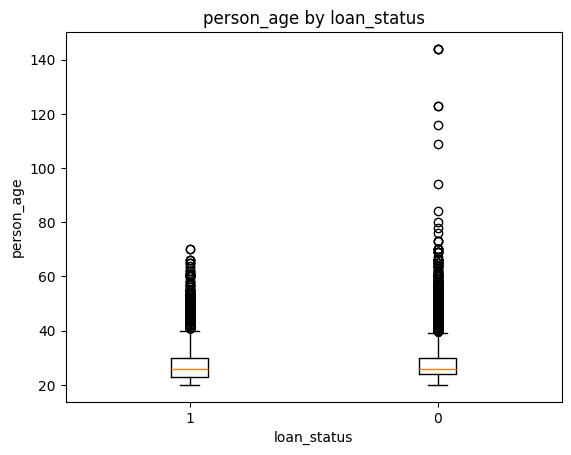

In [33]:
def plot_boxplot_num_cat(num_col, cat_col):
    groups = df[cat_col].unique()
    data = [df[df[cat_col] == group][num_col] for group in groups]
    plt.figure()
    plt.boxplot(data, labels=groups)
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.title(f'{num_col} by {cat_col}')
    plt.show()
plot_boxplot_num_cat('loan_amnt','loan_status')
plot_boxplot_num_cat('person_income','loan_status')
plot_boxplot_num_cat('loan_int_rate','loan_status')
plot_boxplot_num_cat('person_age','loan_status')

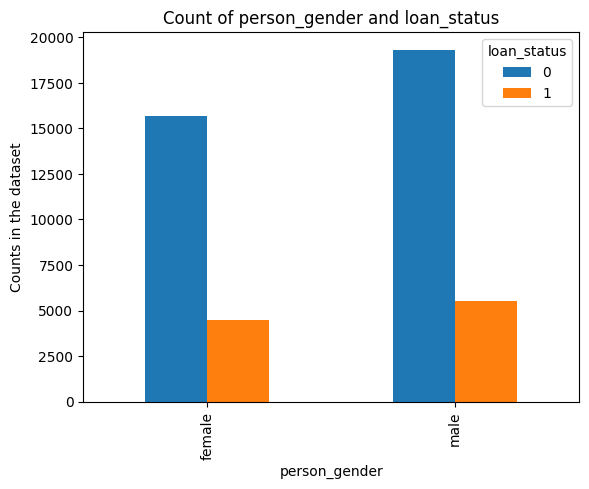

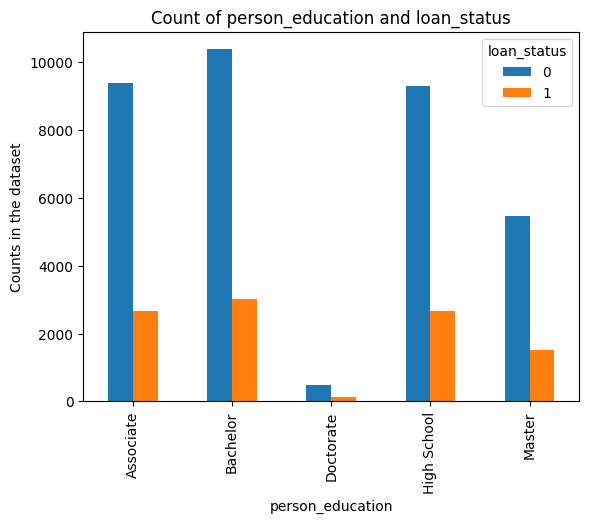

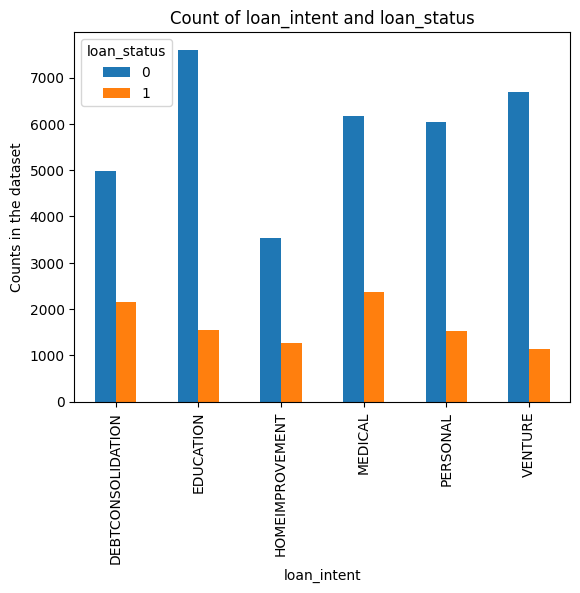

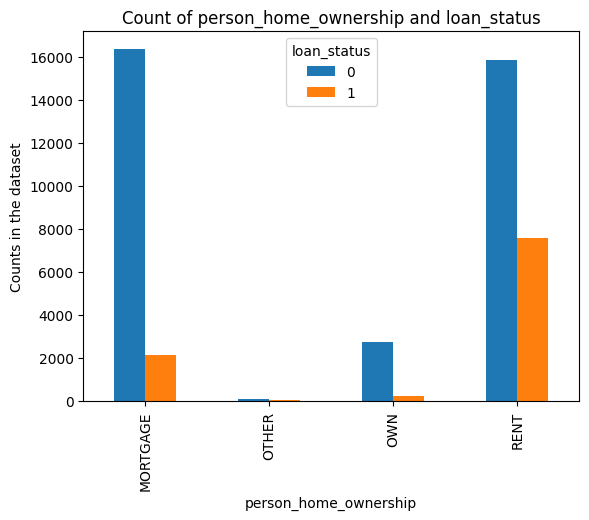

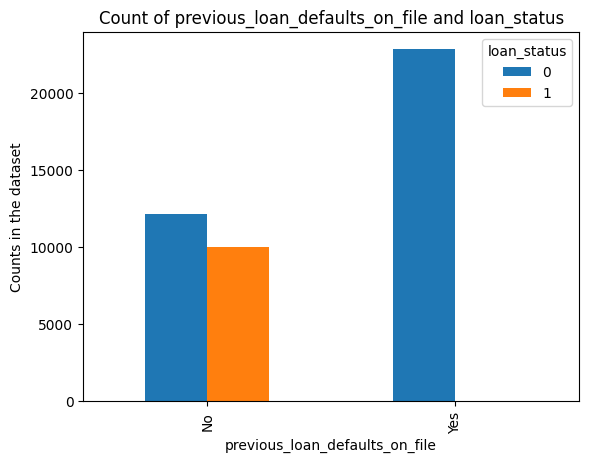

In [34]:
#Bat graph count of various categories by a target Variable(loan status)
def plot_combined_countplot(x_col, col_hue):
    grouped = pd.crosstab(df[x_col], df[col_hue])
    grouped.plot(kind='bar')
    plt.xlabel(x_col)
    plt.ylabel('Counts in the dataset')
    plt.title(f'Count of {x_col} and {col_hue}')
    plt.legend(title=col_hue)
    plt.show()
plot_combined_countplot('person_gender', 'loan_status')
plot_combined_countplot('person_education', 'loan_status')
plot_combined_countplot('loan_intent', 'loan_status')
plot_combined_countplot('person_home_ownership', 'loan_status')
plot_combined_countplot('previous_loan_defaults_on_file', 'loan_status')


In [35]:
pd.crosstab(df['loan_intent'],df['loan_status'])

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,4982,2163
EDUCATION,7601,1552
HOMEIMPROVEMENT,3525,1258
MEDICAL,6170,2378
PERSONAL,6031,1521
VENTURE,6691,1128


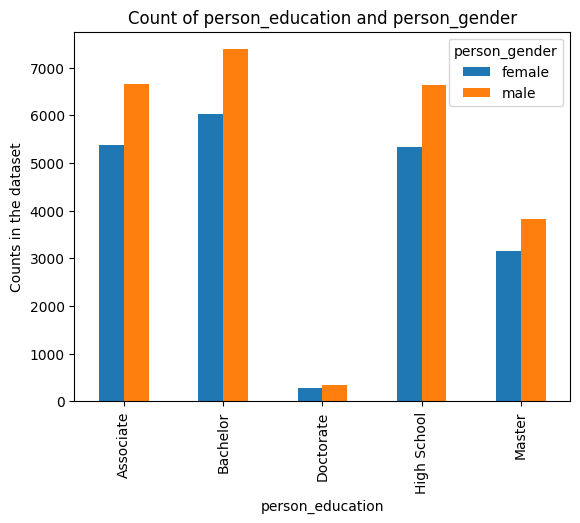

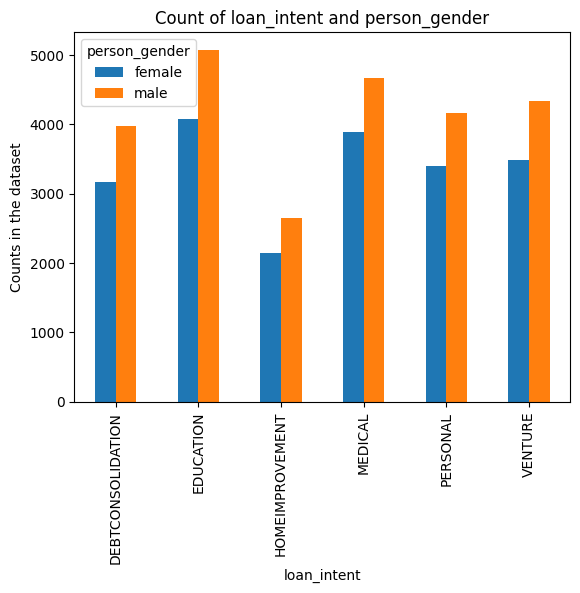

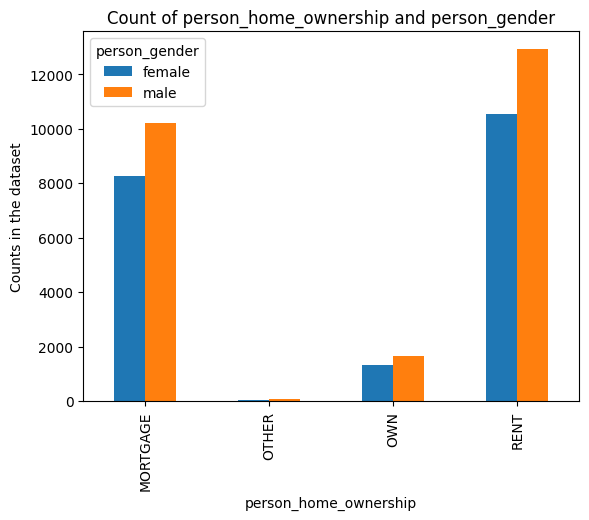

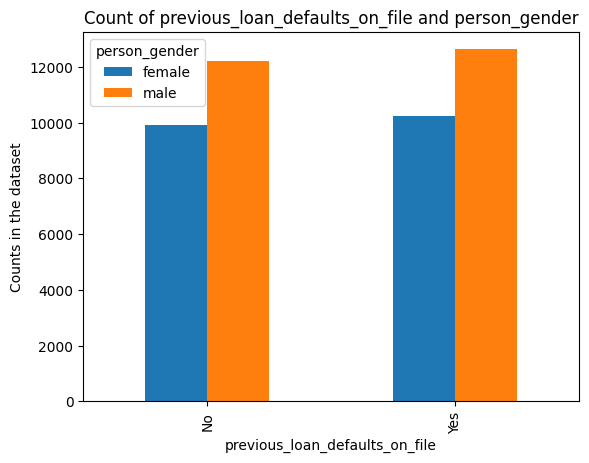

In [38]:
#plot_combined_countplot('person_gender', 'loan_status')
plot_combined_countplot('person_education', 'person_gender')
plot_combined_countplot('loan_intent', 'person_gender')
plot_combined_countplot('person_home_ownership', 'person_gender')
plot_combined_countplot('previous_loan_defaults_on_file', 'person_gender')
    

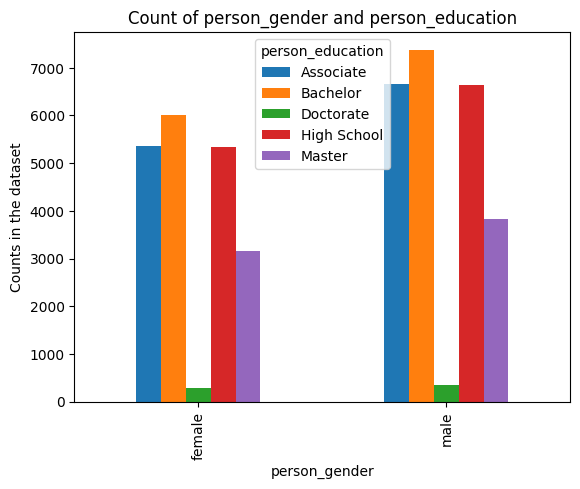

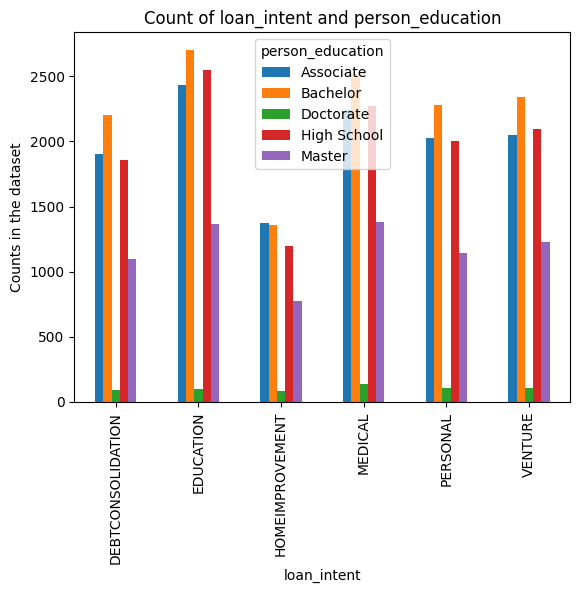

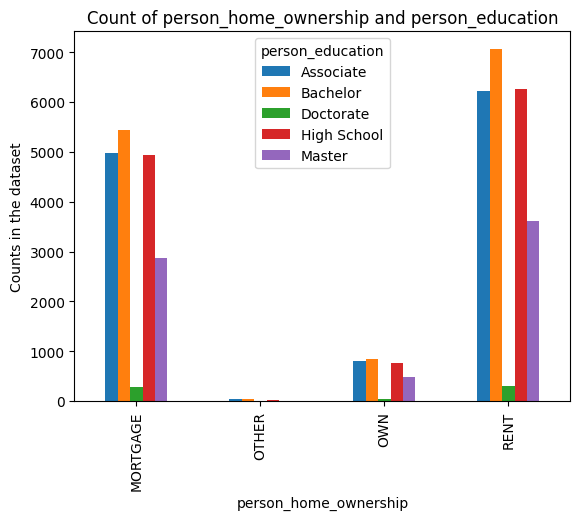

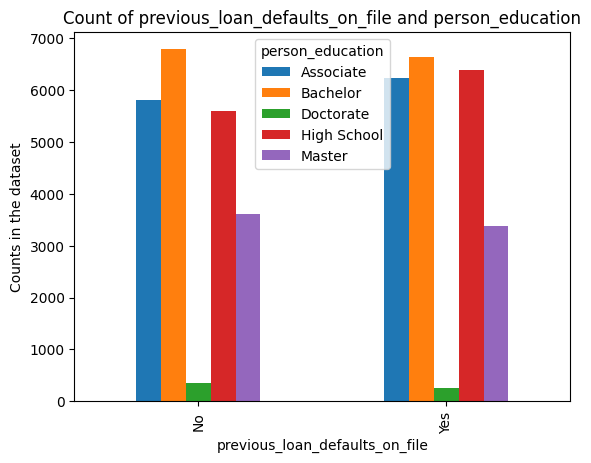

In [40]:
#plot_combined_countplot('person_gender', 'loan_status')
plot_combined_countplot('person_gender', 'person_education')
plot_combined_countplot('loan_intent', 'person_education')
plot_combined_countplot('person_home_ownership', 'person_education')
plot_combined_countplot('previous_loan_defaults_on_file', 'person_education')
    